In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from activations import Cosine
from networks import WHVINetwork
from layers import WHVILinear

In [2]:
torch.manual_seed(0)  # Seed for reproducibility
n = 128  # Number of sampled inputs
x = torch.distributions.Uniform(-1, 2).sample((n,))

# It seems that [-1 + 3/5 * 3, -1 + 3/5 * 4] is the predefined interval for removing 20% of inputs.
x = x[torch.where((x < -1 + 3 / 5 * 3) | (x > -1 + 3 / 5 * 4))]

# It seems that y = f(x) + eps where eps ~ N(0, exp(-3)). The authors do not explicitly say what f is.
# For this reason, we define a similar polynomial and see if we observe a similar pattern.
# The polynomial coefficients are chosen based on observed extrema in the plot.
xs_poly = [-2.0, -1.5, -0.8, 0.0, 0.5, 1.4, 2.0, 2.7, 3.0]
ys_poly = [1.2, 1.5, 2.0, 0.5, -0.5, 1.2, 0.0, 1.0, 1.3]
vmat = np.vander(xs_poly, len(xs_poly))
coef = np.linalg.solve(vmat, ys_poly)


def f(x):
    return torch.from_numpy(np.polyval(coef, x))


y = f(x) + torch.distributions.Normal(0, np.sqrt(np.exp(-3))).sample((len(x),))

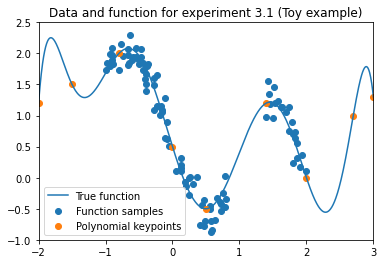

In [3]:
plt.figure()
xs_ls = torch.linspace(-2, 3, 1000)
plt.title('Data and function for experiment 3.1 (Toy example)')
plt.plot(xs_ls, f(xs_ls), label='True function')
plt.scatter(x, y, label='Function samples')
plt.scatter(xs_poly, ys_poly, label='Polynomial keypoints')
plt.ylim(-1, 2.5)
plt.xlim(-2, 3)
plt.legend()
plt.show()

In [4]:
train_x = torch.reshape(x, (-1, 1))
train_y = torch.reshape(y, (-1, 1))
net = WHVINetwork([
    nn.Linear(1, 128),
    Cosine(),
    WHVILinear(128),
    Cosine(),
    WHVILinear(128),
    Cosine(),
    nn.Linear(128, 1)],
    loss_function=F.mse_loss
)
net.train()
optimizer = optim.Adam(net.parameters(), lr=0.15)

In [5]:
train_y.shape

torch.Size([103, 1])

In [6]:
for epoch in range(5000):  # Number of epochs not given in paper
    loss = net.loss(train_x, train_y)  # Number of samples not given in paper
    loss.backward()
    print(f'Epoch {epoch + 1}, loss = {float(loss):.3f}')
    optimizer.step()
    net.zero_grad()

Epoch 1, loss = 186675040.000
Epoch 2, loss = 249665616.000
Epoch 3, loss = 15995760640.000
Epoch 4, loss = 420206208.000
Epoch 5, loss = 7131792384.000
Epoch 6, loss = 11037089792.000
Epoch 7, loss = 4859076608.000
Epoch 8, loss = 135503280.000
Epoch 9, loss = 2150090240.000
Epoch 10, loss = 5808699392.000
Epoch 11, loss = 5241992192.000
Epoch 12, loss = 1877949696.000
Epoch 13, loss = 17581918.000
Epoch 14, loss = 1262700544.000
Epoch 15, loss = 3217487872.000
Epoch 16, loss = 3143774976.000
Epoch 17, loss = 1353382400.000
Epoch 18, loss = 60300508.000
Epoch 19, loss = 501255808.000
Epoch 20, loss = 1697191424.000
Epoch 21, loss = 1958914304.000
Epoch 22, loss = 1035518976.000
Epoch 23, loss = 114622208.000
Epoch 24, loss = 179204000.000
Epoch 25, loss = 891840576.000
Epoch 26, loss = 1196499968.000
Epoch 27, loss = 722780288.000
Epoch 28, loss = 114273128.000
Epoch 29, loss = 75140616.000
Epoch 30, loss = 500389504.000
Epoch 31, loss = 726181888.000
Epoch 32, loss = 455313600.000
Ep

KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.ylim(-1, 2.5)
plt.xlim(-2, 3)
test_x = torch.reshape(torch.linspace(-2, 3, 1000), (-1, 1))
for _ in range(100):
    out_y = net(test_x)
    plt.plot(test_x.numpy().ravel(), out_y.detach().numpy().ravel(), c='b', alpha=0.05)
plt.plot(xs_ls, f(xs_ls), label='True function')
plt.scatter(x, y, label='Function samples')
plt.legend()
plt.show()